## Visualisation d'une distribution

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
iha = pd.read_csv('c:/temp/data/IBM_HR_ATTRITION.csv')
iha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

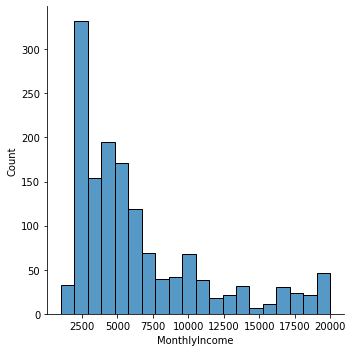

In [6]:
sns.displot(iha, x='MonthlyIncome')

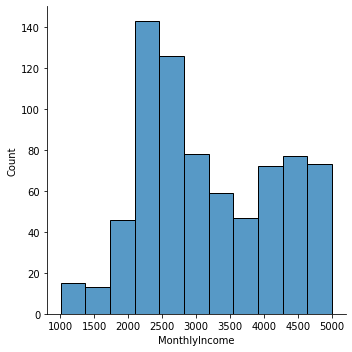

In [8]:
filter = iha['MonthlyIncome'] < 5001
sns.displot(iha.where(filter), x='MonthlyIncome')

## Visualisation linéaire

In [10]:
iha2 = iha.replace({'Attrition': {'Yes': 1, 'No': 0}})

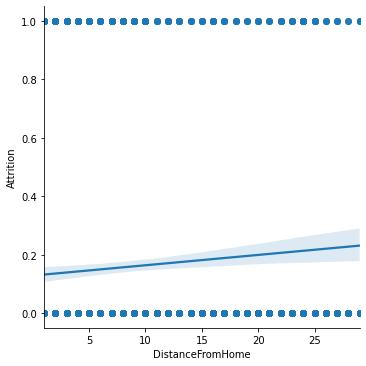

In [11]:
sns.lmplot(x='DistanceFromHome', y='Attrition', data=iha2)

La distance ne semble pas influer énormément sur la probabilité de départ.
On observe malgré tout que la corrélation est croissante ce qui permet de dire qu'elle a une petite influence quand même.

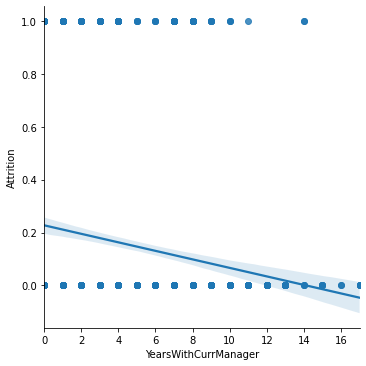

In [12]:
sns.lmplot(x='YearsWithCurrManager', y='Attrition', data=iha2)

L'influence est plus importante pour le temps passé avec le manager que ce qu'on a vu avec la distance du domicile.
On a par contre une courbe inversé dans ce cas.

## Visualisation d'une heatmap

In [13]:
hp = pd.read_csv('c:/temp/data/house_pricing.csv');
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
hp.iloc[:,-15:].corr()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
WoodDeckSF,1.000000,0.058661,-0.125989,-0.032771,-0.074181,0.073378,-0.009551,0.021011,0.022270,0.324413
OpenPorchSF,0.058661,1.000000,-0.093079,-0.005842,0.074304,0.060762,-0.018584,0.071255,-0.057619,0.315856
EnclosedPorch,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.028887,-0.009916,-0.128578
3SsnPorch,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992,0.000354,0.029474,0.018645,0.044584
ScreenPorch,-0.074181,0.074304,-0.082864,-0.031436,1.000000,0.051307,0.031946,0.023217,0.010694,0.111447
PoolArea,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.029669,-0.033737,-0.059689,0.092404
MiscVal,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
MoSold,0.021011,0.071255,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.046432
YrSold,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923
SalePrice,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


<AxesSubplot:>

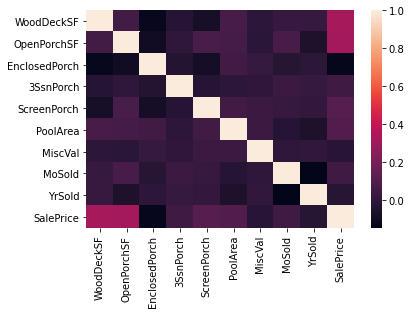

In [17]:
sns.heatmap(hp.iloc[:,-15:].corr())

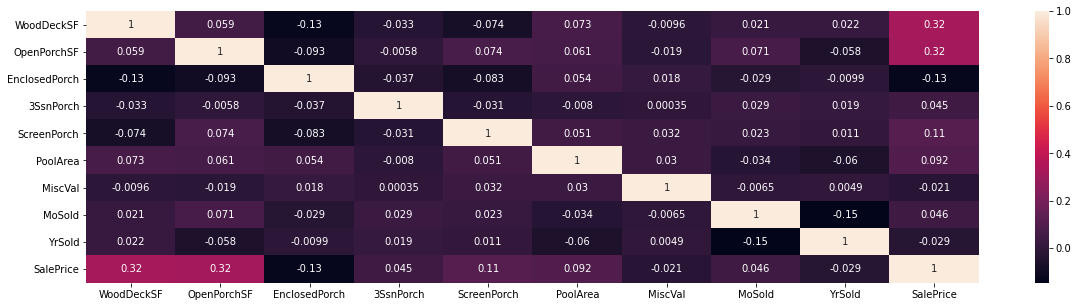

In [18]:
f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(hp.iloc[:,-15:].corr(), annot=True, ax =ax)
plt.savefig('heatmapEX1.png')